In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, LSTM, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [5]:
df = pd.read_csv(r"C:\Users\Home\Desktop\Abhishek\Python\Python Database\MSFT_1.csv", parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-17,45.450001,45.709999,44.250000,44.529999,39.746288,82180300
1,2014-07-18,44.650002,44.840000,44.250000,44.689999,39.889099,43407500
2,2014-07-21,44.560001,45.160000,44.220001,44.840000,40.022984,37604400
3,2014-07-22,45.000000,45.150002,44.590000,44.830002,40.014069,43095800
4,2014-07-23,45.450001,45.450001,44.619999,44.869999,40.049759,52362900


In [4]:
data = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Date'], axis='columns')
data.head()

,Close
0,44.529999
1,44.689999
2,44.840000
3,44.830002
4,44.869999


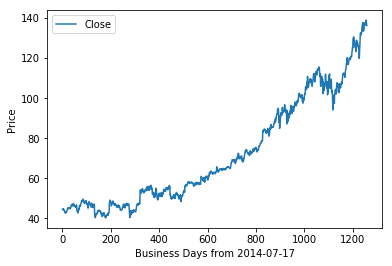

In [8]:
plt.plot(data.Close)
plt.xlabel("Business Days from 2014-07-17")
plt.ylabel("Price")
plt.legend()
plt.show()

In [9]:
train = data.values[:1000,0]
test = data.values[1000:,0]
train_idx = data.index[:1000]
test_idx = data.index[1000:]

No handles with labels found to put in legend.


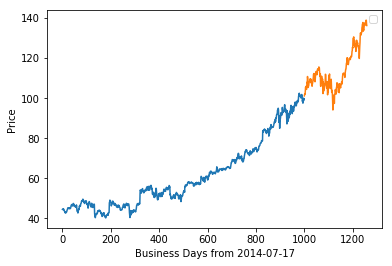

In [10]:
plt.plot(train_idx, train)
plt.plot(test_idx, test)
plt.xlabel("Business Days from 2014-07-17")
plt.ylabel("Price")
plt.legend()
plt.show()

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

scaled_data.size

1259

In [29]:
X_train, y_train = [], []

for i in range(60, len(train)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape

(940, 60)

In [23]:
X_test = []

inputs = data[len(data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)

for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)

X_test.size

15540

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [60]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_test.shape[1],1)))
model.add(Dropout(0))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0))
model.add(LSTM(units=100))
model.add(Dropout(0))
model.add(Dense(units=1))

In [61]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [62]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
940/940 [==============================] - 9s 10ms/step - loss: 0.0113
Epoch 2/50
940/940 [==============================] - 8s 8ms/step - loss: 7.1922e-04
Epoch 3/50
940/940 [==============================] - 7s 8ms/step - loss: 4.8977e-04
Epoch 4/50
940/940 [==============================] - 8s 8ms/step - loss: 4.7567e-04
Epoch 5/50
940/940 [==============================] - 7s 8ms/step - loss: 4.6451e-04
Epoch 6/50
940/940 [==============================] - 8s 8ms/step - loss: 6.7576e-04
Epoch 7/50
940/940 [==============================] - 8s 8ms/step - loss: 5.1747e-04
Epoch 8/50
940/940 [==============================] - 8s 8ms/step - loss: 4.6318e-04
Epoch 9/50
940/940 [==============================] - 8s 8ms/step - loss: 6.2263e-04
Epoch 10/50
940/940 [==============================] - 8s 8ms/step - loss: 4.7811e-04
Epoch 11/50
940/940 [==============================] - 8s 9ms/step - loss: 4.6020e-04
Epoch 12/50
940/940 [==============================] - 8s 8ms/step

In [63]:
yp = model.predict(X_test)
yp = scaler.inverse_transform(yp)

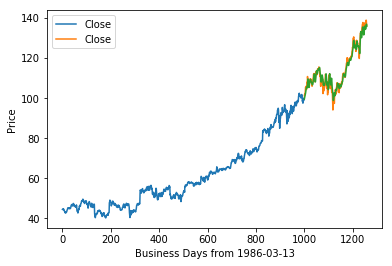

In [64]:
X_train = data.index[:1000]
X_test = data.index[1000:]
y_train = data.Close[:1000]
y_test = data.Close[1000:]

plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_test, yp)
plt.xlabel("Business Days from 1986-03-13")
plt.ylabel("Price")
plt.legend()
plt.show()